In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive/')

Drive already mounted at /content/MyDrive/; to attempt to forcibly remount, call drive.mount("/content/MyDrive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df2= pd.read_csv("/content/MyDrive/MyDrive/Allfalltypesnew.csv")

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173649 entries, 0 to 173648
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   AccX           173649 non-null  float64
 1   AccY           173649 non-null  float64
 2   AccZ           173649 non-null  float64
 3   GyrX           173649 non-null  float64
 4   GyrY           173649 non-null  float64
 5   GyrZ           173649 non-null  float64
 6   EulerX         173649 non-null  float64
 7   EulerY         173649 non-null  float64
 8   EulerZ         173649 non-null  float64
 9   TrialID        173649 non-null  int64  
 10  TaskID         173649 non-null  int64  
 11  Subject        173649 non-null  object 
 12  DescriptionID  173649 non-null  int64  
 13  Description    173649 non-null  object 
 14  FTLabels       173649 non-null  int64  
 15  FallTypes      173649 non-null  object 
dtypes: float64(9), int64(4), object(3)
memory usage: 21.2+ MB


In [ ]:
df2.FallTypes.value_counts()

Forward     107817
Lateral      33957
Backward     23576
Dampen        8299
Name: FallTypes, dtype: int64

In [ ]:
df2.FTLabels.value_counts()

0    107817
1     33957
2     23576
3      8299
Name: FTLabels, dtype: int64

In [ ]:
cols_to_scale = ['AccX','AccY','AccZ','GyrX','GyrY','GyrZ','EulerX','EulerY','EulerZ']

from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173649 entries, 0 to 173648
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   AccX           173649 non-null  float64
 1   AccY           173649 non-null  float64
 2   AccZ           173649 non-null  float64
 3   GyrX           173649 non-null  float64
 4   GyrY           173649 non-null  float64
 5   GyrZ           173649 non-null  float64
 6   EulerX         173649 non-null  float64
 7   EulerY         173649 non-null  float64
 8   EulerZ         173649 non-null  float64
 9   TrialID        173649 non-null  int64  
 10  TaskID         173649 non-null  int64  
 11  Subject        173649 non-null  object 
 12  DescriptionID  173649 non-null  int64  
 13  Description    173649 non-null  object 
 14  FTLabels       173649 non-null  int64  
 15  FallTypes      173649 non-null  object 
dtypes: float64(9), int64(4), object(3)
memory usage: 21.2+ MB


In [ ]:
df2 = pd.get_dummies(data = df2, columns=['DescriptionID'])
df2 = pd.get_dummies(data = df2, columns=['FallTypes'])
df2.columns

Index(['AccX', 'AccY', 'AccZ', 'GyrX', 'GyrY', 'GyrZ', 'EulerX', 'EulerY',
       'EulerZ', 'TrialID', 'TaskID', 'Subject', 'Description', 'FTLabels',
       'DescriptionID_1', 'DescriptionID_2', 'DescriptionID_3',
       'DescriptionID_4', 'DescriptionID_5', 'DescriptionID_6',
       'DescriptionID_7', 'DescriptionID_8', 'DescriptionID_9',
       'DescriptionID_10', 'DescriptionID_11', 'DescriptionID_12',
       'DescriptionID_13', 'DescriptionID_14', 'DescriptionID_15',
       'FallTypes_Backward', 'FallTypes_Dampen', 'FallTypes_Forward',
       'FallTypes_Lateral'],
      dtype='object')

In [ ]:
X = df2[['AccX', 'AccY', 'AccZ', 'GyrX', 'GyrY', 'GyrZ', 'EulerX', 'EulerY','EulerZ',
       'DescriptionID_1', 'DescriptionID_2', 'DescriptionID_3',
       'DescriptionID_4', 'DescriptionID_5', 'DescriptionID_6',
       'DescriptionID_7', 'DescriptionID_8', 'DescriptionID_9',
       'DescriptionID_10', 'DescriptionID_11', 'DescriptionID_12',
       'DescriptionID_13', 'DescriptionID_14', 'DescriptionID_15',]]
X = np.asarray(X)

In [ ]:
y = df2[['FallTypes_Backward', 'FallTypes_Dampen', 'FallTypes_Forward','FallTypes_Lateral']]
y = np.asarray(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

In [ ]:
X.shape , y.shape

((173649, 24), (173649, 4))

In [ ]:
model = Sequential([
    Dense(64, input_shape=(24,), activation="relu"),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
]);

In [ ]:
model = Sequential([
    Dense(64, input_shape=(24,), activation="relu"),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(4, activation='softmax')
]);

In [ ]:
from tensorflow.keras.initializers import RandomNormal, Constant# Model with default batch normalization
model = Sequential([
    Dense(64, input_shape=(24,), activation="relu"),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(
        momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)
    ),
    Dense(4, activation='softmax')
]);

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                1600      
                                                                 
 batch_normalization_5 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 128)               8320      
                                                                 
 batch_normalization_6 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_7 (Batc  (None, 128)             

In [ ]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/200
2605/2605 - 16s - loss: 0.0086 - accuracy: 0.9983 - val_loss: 2.0607e-05 - val_accuracy: 1.0000 - 16s/epoch - 6ms/step
Epoch 2/200
2605/2605 - 8s - loss: 6.2142e-04 - accuracy: 0.9999 - val_loss: 1.9520e-06 - val_accuracy: 1.0000 - 8s/epoch - 3ms/step
Epoch 3/200
2605/2605 - 8s - loss: 0.0014 - accuracy: 0.9996 - val_loss: 2.5639e-06 - val_accuracy: 1.0000 - 8s/epoch - 3ms/step
Epoch 4/200
2605/2605 - 8s - loss: 0.0018 - accuracy: 0.9995 - val_loss: 3.6473e-06 - val_accuracy: 1.0000 - 8s/epoch - 3ms/step
Epoch 5/200
2605/2605 - 8s - loss: 2.1091e-05 - accuracy: 1.0000 - val_loss: 6.4025e-07 - val_accuracy: 1.0000 - 8s/epoch - 3ms/step
Epoch 6/200
2605/2605 - 8s - loss: 5.2366e-06 - accuracy: 1.0000 - val_loss: 2.1943e-07 - val_accuracy: 1.0000 - 8s/epoch - 3ms/step
Epoch 7/200
2605/2605 - 8s - loss: 1.5553e-06 - accuracy: 1.0000 - val_loss: 6.7801e-08 - val_accuracy: 1.0000 - 8s/epoch - 3ms/step
Epoch 8/200
2605/2605 - 7s - loss: 5.8201e-07 - accuracy: 1.0000 - val_loss: 9.

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

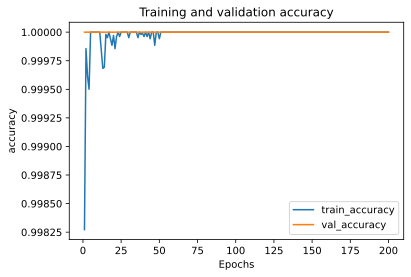

In [ ]:
plot_metric(history, 'accuracy')

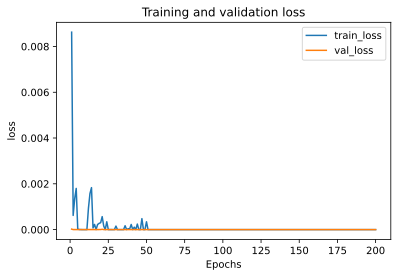

In [ ]:
plot_metric(history, 'loss')

In [ ]:
model.evaluate(X_test, y_test, verbose=2)

1086/1086 - 2s - loss: 0.0000e+00 - accuracy: 1.0000 - 2s/epoch - 2ms/step


[0.0, 1.0]

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(matrix)

[[ 4604     0     0     0]
 [    0  1737     0     0]
 [    0     0 21674     0]
 [    0     0     0  6715]]


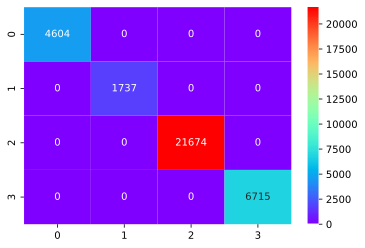

In [ ]:
import seaborn as sns
sns.heatmap(matrix, annot=True, fmt='d',  cmap=plt.cm.rainbow)

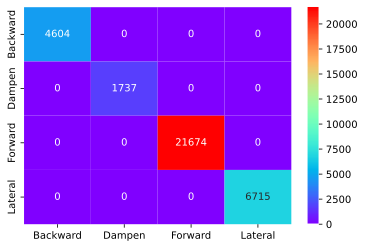

In [ ]:
import seaborn as sns
df_cnf_matrix = pd.DataFrame(matrix, index = ({'Backward':0,'Dampen':1,'Forward':2,'Lateral':3}), columns = ({'Backward':0,'Dampen':1,'Forward':2,'Lateral':3}))
sns.heatmap(df_cnf_matrix, annot=True, fmt='d',  cmap=plt.cm.rainbow)